In [85]:
import pickle
import os

#FOLDER = os.getcwd() + "/45cells"
FOLDER = os.getcwd() + "/eye"

with open(FOLDER+'/ori.pkl', 'rb') as file:   
    ori = pickle.load(file)
with open(FOLDER+'/mask.pkl', 'rb') as file:   
    mask = pickle.load(file)
with open(FOLDER+'/out.pkl', 'rb') as file:   
    out = pickle.load(file)


In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = [15, 5]
import math
import numpy as np

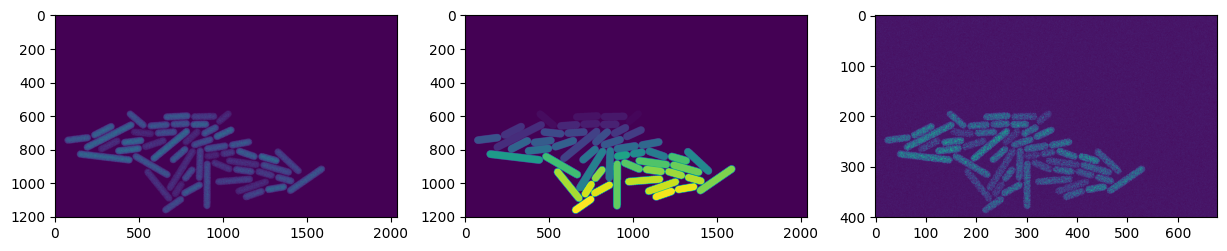

In [75]:
f, axarr = plt.subplots(1,3)
axarr[0].plot(100,100)
axarr[0].imshow(ori)
axarr[1].imshow(mask)
axarr[2].imshow(out)
plt.show()

In [76]:
#Final all mid points of cells

min_x = {}
max_x = {}
min_y = {}
max_y = {}

(maskWidth, maskHeight) = mask.shape
print(maskWidth, maskHeight)

for i in range(maskWidth):
    for j in range(maskHeight):
        #Add mask value to dictionaries
        if (not mask[i][j] in min_x.keys()):
            min_x[mask[i][j]] = math.inf
            max_x[mask[i][j]] = -1
            min_y[mask[i][j]] = math.inf
            max_y[mask[i][j]] = -1
        
        min_x[mask[i][j]] = min(min_x[mask[i][j]],i)
        max_x[mask[i][j]] = max(max_x[mask[i][j]],i)
        min_y[mask[i][j]] = min(min_y[mask[i][j]],j)
        max_y[mask[i][j]] = max(max_y[mask[i][j]],j)

midpt = {}

for k in min_x.keys():
    midpt[k] = ((min_x[k]+max_x[k])/2,(min_y[k]+max_y[k])/2)

del(midpt[0.0])
print(midpt)


1203 2037
{1.5259022e-05: (610.5, 1005.0), 3.0518044e-05: (622.5, 486.5), 4.5777066e-05: (603.5, 726.0), 6.103609e-05: (604.0, 888.0), 7.629511e-05: (648.5, 745.5), 9.155413e-05: (651.0, 862.0), 0.00010681315: (656.5, 617.0), 0.00012207218: (720.5, 322.5), 0.0001373312: (689.0, 284.5), 0.00015259022: (687.5, 922.5), 0.00016784924: (703.5, 1006.5), 0.00018310826: (773.0, 686.5), 0.00019836728: (699.0, 661.0), 0.0002136263: (701.5, 521.0), 0.00022888533: (726.0, 813.0), 0.00024414435: (737.5, 134.5), 0.00025940337: (757.0, 877.0), 0.0002746624: (752.5, 462.5), 0.00028992142: (766.0, 591.5), 0.00030518044: (773.0, 323.5), 0.00032043946: (765.0, 1104.5), 0.00033569848: (787.5, 960.0), 0.0003509575: (801.5, 437.0), 0.00036621653: (831.0, 738.5), 0.00038147555: (888.0, 861.5), 0.00039673457: (826.5, 1142.0), 0.0004119936: (920.5, 751.5), 0.00044251163: (871.0, 1388.0), 0.00045777066: (821.5, 1028.5), 0.00051880674: (845.0, 296.0), 0.0005493248: (836.5, 934.5), 0.00065613794: (896.0, 575.0), 

<function matplotlib.pyplot.show(close=None, block=None)>

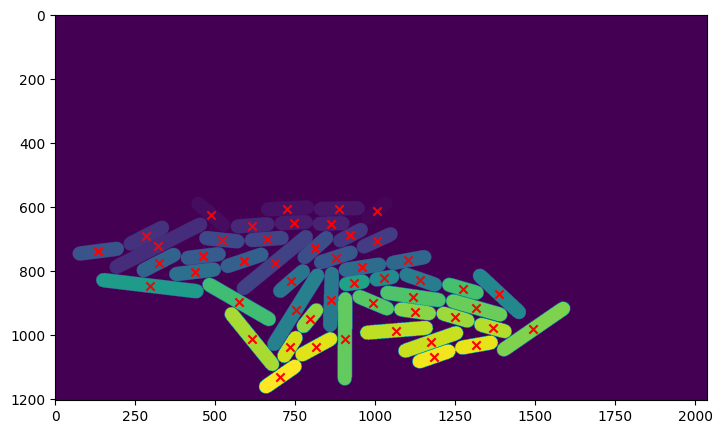

In [77]:
plt.imshow(mask)
for k in midpt:
    plt.scatter(midpt[k][1],midpt[k][0],color='red',marker='x')
plt.show

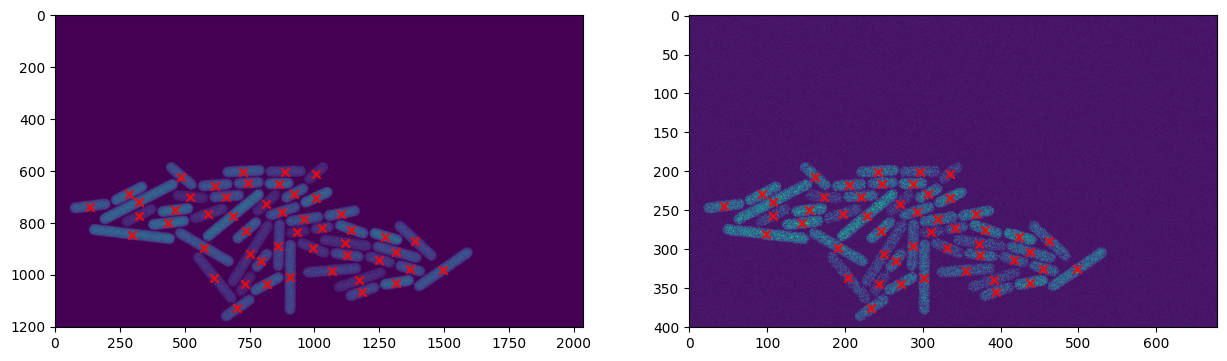

{1.5259022e-05: 1.5259022e-05, 3.0518044e-05: 0.0001373312, 4.5777066e-05: 7.629511e-05, 6.103609e-05: 1.5259022e-05, 7.629511e-05: 4.5777066e-05, 9.155413e-05: 4.5777066e-05, 0.00010681315: 6.103609e-05, 0.00012207218: 6.103609e-05, 0.0001373312: 0.00010681315, 0.00015259022: 6.103609e-05, 0.00016784924: 0.00012207218, 0.00018310826: 0.00012207218, 0.00019836728: 3.0518044e-05, 0.0002136263: 4.5777066e-05, 0.00022888533: 3.0518044e-05, 0.00024414435: 6.103609e-05, 0.00025940337: 1.5259022e-05, 0.0002746624: 0.0, 0.00028992142: 3.0518044e-05, 0.00030518044: 3.0518044e-05, 0.00032043946: 6.103609e-05, 0.00033569848: 9.155413e-05, 0.0003509575: 0.00012207218, 0.00036621653: 0.00012207218, 0.00038147555: 7.629511e-05, 0.00039673457: 0.00010681315, 0.0004119936: 4.5777066e-05, 0.00044251163: 1.5259022e-05, 0.00045777066: 1.5259022e-05, 0.00051880674: 0.00015259022, 0.0005493248: 1.5259022e-05, 0.00065613794: 4.5777066e-05, 0.00067139696: 9.155413e-05, 0.000686656: 7.629511e-05, 0.000701915

In [78]:
originalIntensity = {}
outputIntensity = {}


(originalWidth, originalHeight) = ori.shape
(outputWidth, outputHeight) = out.shape

f, axarr = plt.subplots(1,2)
axarr[0].imshow(ori)
axarr[1].imshow(out)
for k in midpt.keys():
    ratioX = midpt[k][0]/maskWidth
    ratioY = midpt[k][1]/maskHeight

    #Get intensity in original image
    originalX  = int(ratioX*originalWidth)
    originalY = int(ratioY*originalHeight)
    axarr[0].scatter(originalY,originalX,color='red',marker='x')

    originalIntensity[k] = ori[originalX][originalY]

    #Get intensity in output image
    outputX  = int(ratioX*outputWidth)
    outputY = int(ratioY*outputHeight)
    axarr[1].scatter(outputY,outputX,color='red',marker='x')

    outputIntensity[k] = out[outputX][outputY]

plt.show()

print(originalIntensity)
print(outputIntensity)
    

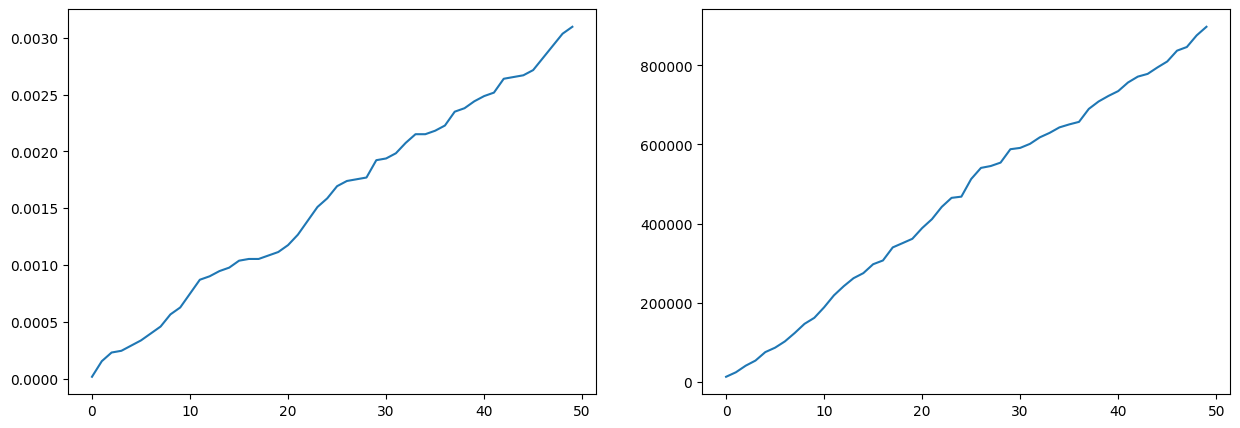

In [79]:
originalIntensityNp = np.asarray([originalIntensity[k] for k in originalIntensity.keys()])
outputIntensityNp = np.asarray([outputIntensity[k] for k in outputIntensity.keys()])

originalIntensityHistagram = np.cumsum(originalIntensityNp)
outputIntensityHistagram = np.cumsum(outputIntensityNp)

f, axarr = plt.subplots(1,2)
axarr[0].plot(originalIntensityHistagram)
axarr[1].plot(outputIntensityHistagram)
plt.show()
